In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams.update({'font.family':'Constantia', 'font.serif':['Constantia']})
plt.rcParams.update({'pdf.fonttype': 'truetype', 'font.size': 18})

In [30]:
train = pd.read_csv('data/train.csv',index_col=0)
test = pd.read_csv('data/test.csv')

In [31]:
train.shape, test.shape

((20758, 17), (13840, 17))

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

In [33]:
categorical = [var for var in train.columns if train[var].dtype == 'object' and var !='NObeyesdad']
numerical = [var for var in train.columns if train[var].dtype != 'object' and var !='NObeyesdad']
target = 'NObeyesdad'

print(f'There are {len(categorical)} categorical variables')
print(categorical)
print('\n')
print(f'There are {len(categorical)} categorical variables')
print(numerical)

There are 8 categorical variables
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


There are 8 categorical variables
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


EDA - univariate analysis

Categorical variables

-unique counts
-count plots

Female    0.502071
Male      0.497929
Name: Gender, dtype: float64


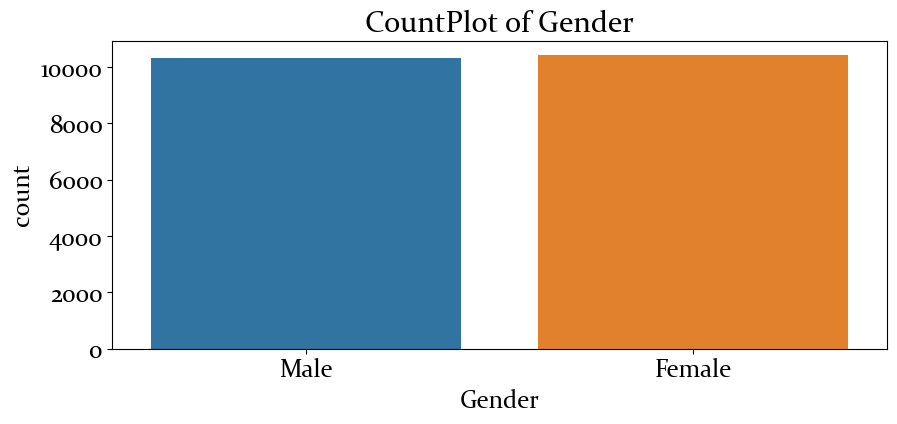



yes    0.819636
no     0.180364
Name: family_history_with_overweight, dtype: float64


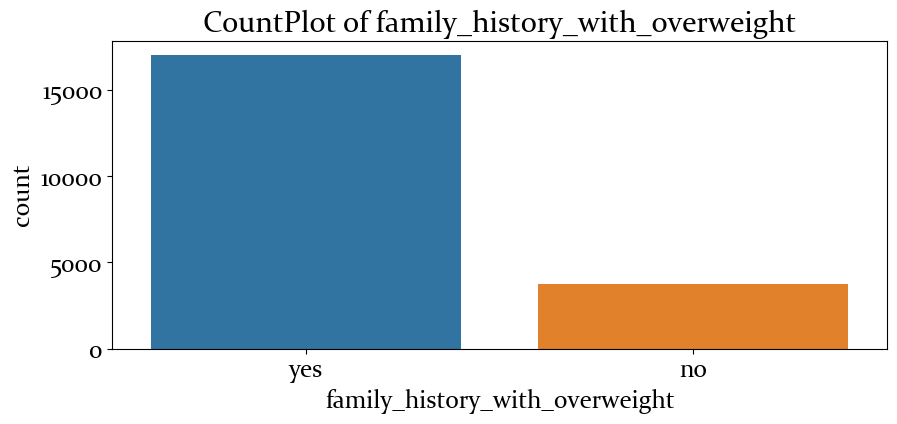



yes    0.914443
no     0.085557
Name: FAVC, dtype: float64


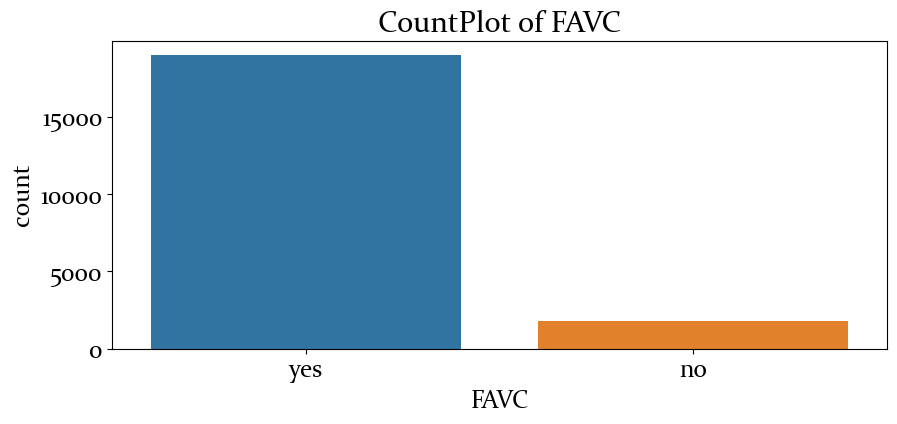



Sometimes     0.844446
Frequently    0.119087
Always        0.023027
no            0.013441
Name: CAEC, dtype: float64


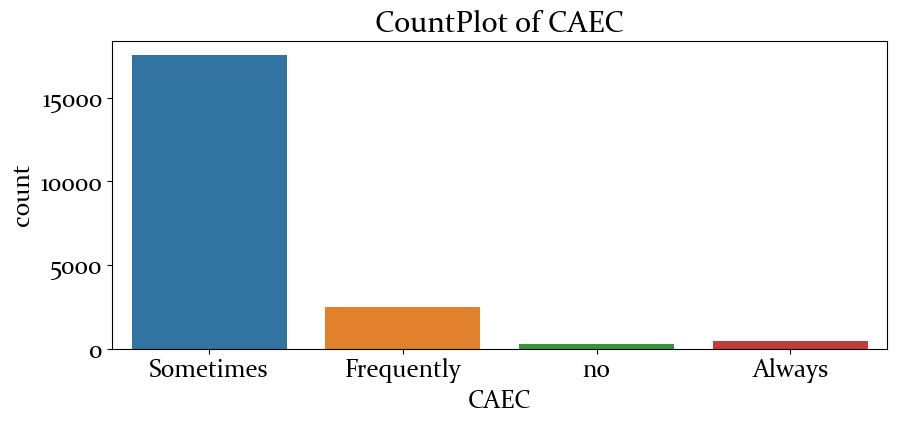



no     0.988197
yes    0.011803
Name: SMOKE, dtype: float64


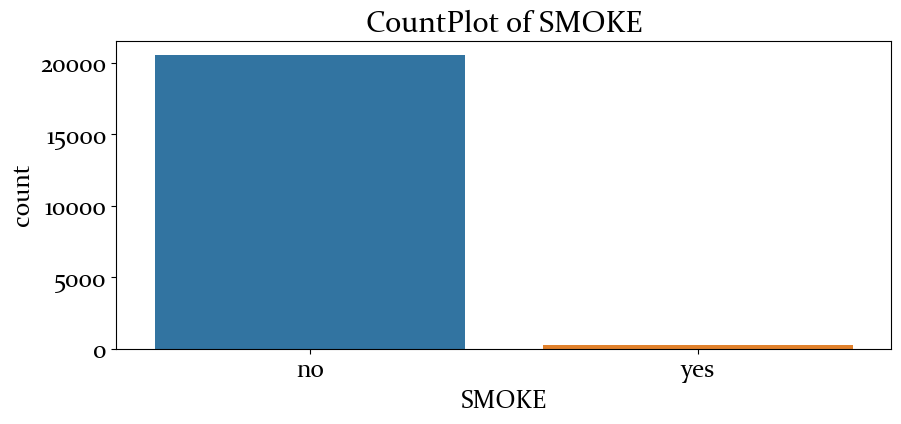



no     0.966904
yes    0.033096
Name: SCC, dtype: float64


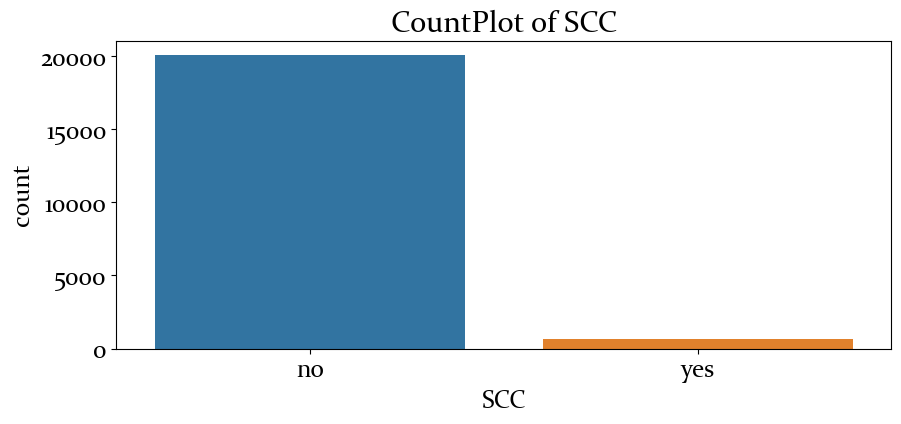



Sometimes     0.725792
no            0.248723
Frequently    0.025484
Name: CALC, dtype: float64


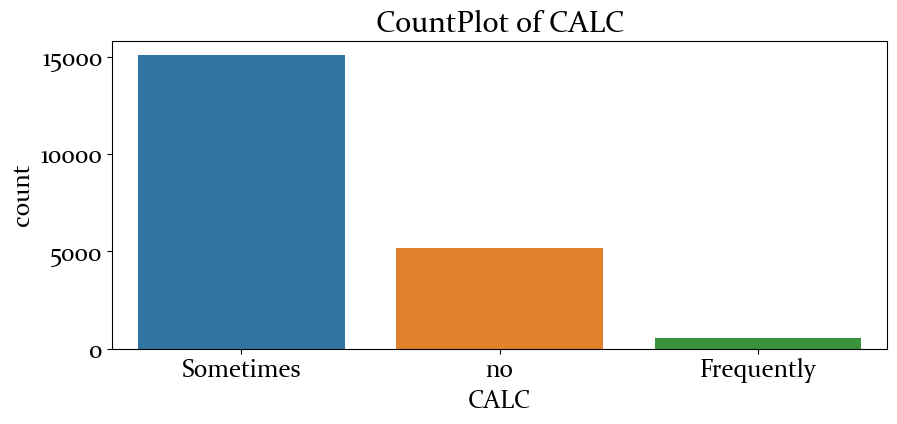



Public_Transportation    0.803883
Automobile               0.170248
Walking                  0.022497
Motorbike                0.001831
Bike                     0.001542
Name: MTRANS, dtype: float64


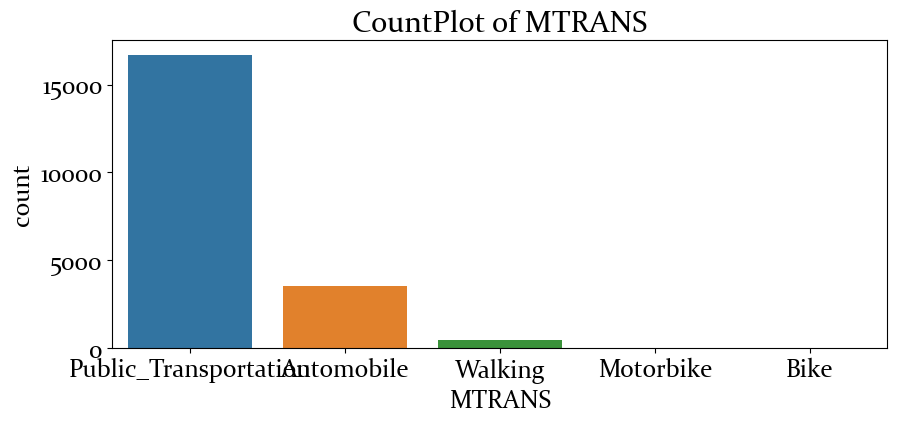

In [85]:
for var in categorical:
    plt.figure(figsize=(10,4))
    print(train[var].value_counts(normalize=True))
    fig = sns.countplot(data=train,x=var)
    fig.set_title(f'CountPlot of {var}')
    plt.show()
    print('\n')
    

Observations

Except for the gender variable, other categorical varibales are not euqally distributed/

Gender - There are equal class disctributions of Male and Female in the dataset. It seems to say that both the genders
are equally affected by Obesity.

family_history_with_overweight - The 'yes' category highly overweighs the 'no' category. There can be a clear conclusion
made that family history with Obesity can affect and can have a significant impact.




Frequent consumption of high caloric food (FAVC) - The 'yes' category highly overweighs the 'no' category. There shouldn't be any surprise that the high calorific intake can lead to obesity.


Consumption of food between meals (CAEC) - Sometimes category has the highest occurence followed by Frequent. There cannot be any clear decision that can be established by this plot


Consumption of alcohol (CALC) - 72% of the people consume alcohol and only 2% consume on a frequent basis


Calories consumption monitoring (SCC) - 96% of the people dont monitor or count their calories consumption. 

Transportation used (MTRANS) - 80% of the people use public transport, since this is more of a economic and a personal preference, more analysis needed to conclude.

SMOKE - 98% of the persons in the dataset dont smoke. It can be said that Smoke may not affect obesity.

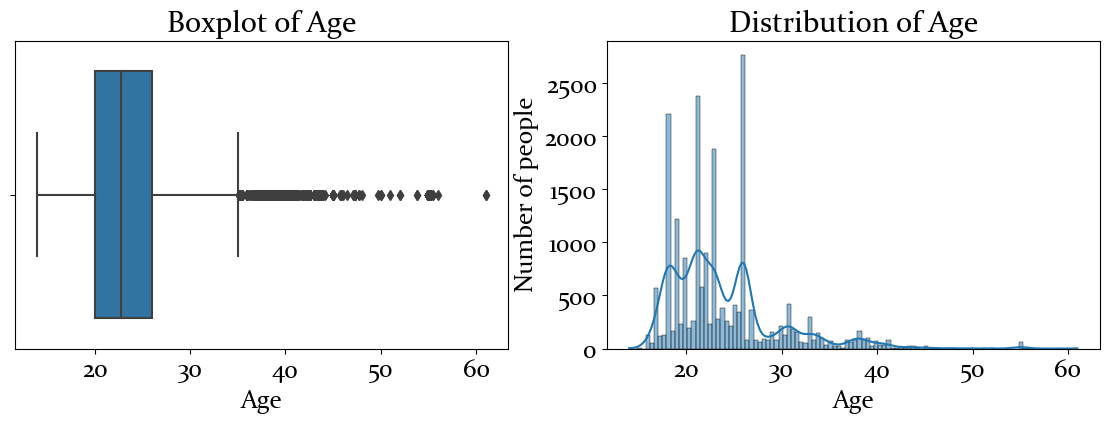

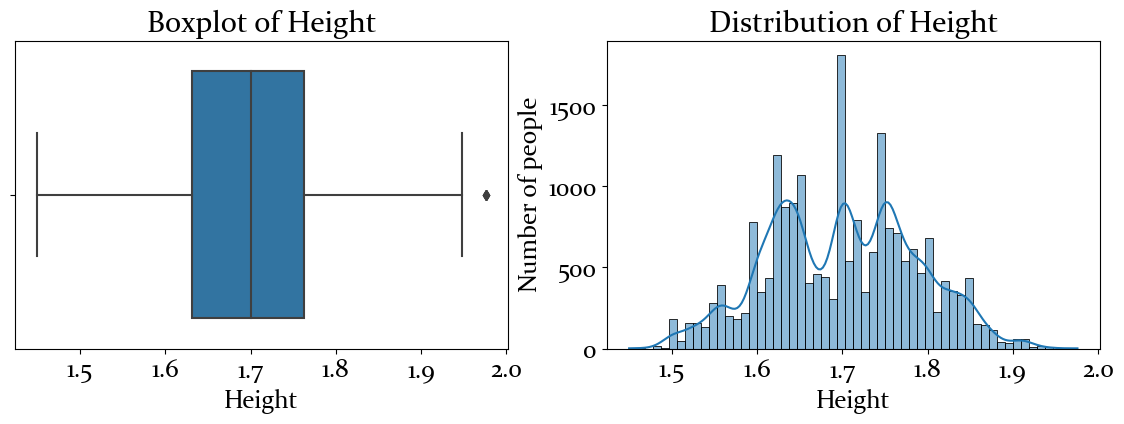

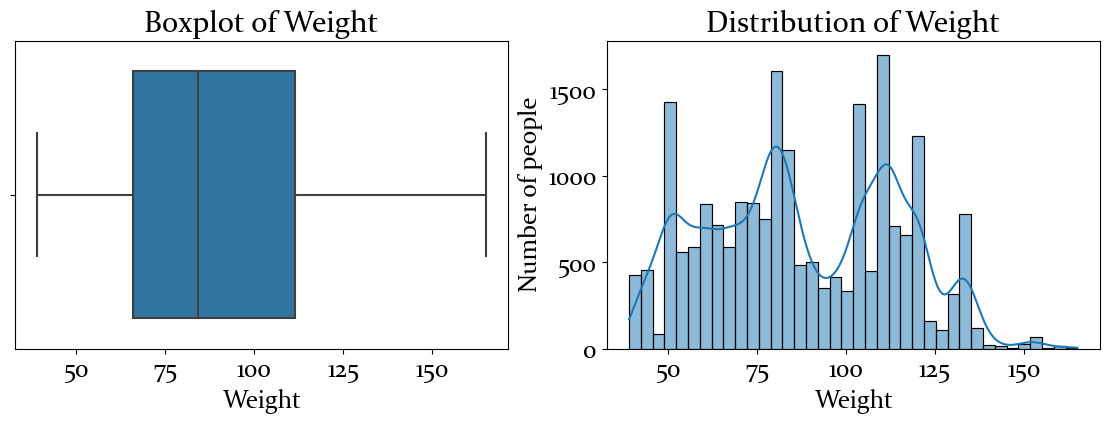

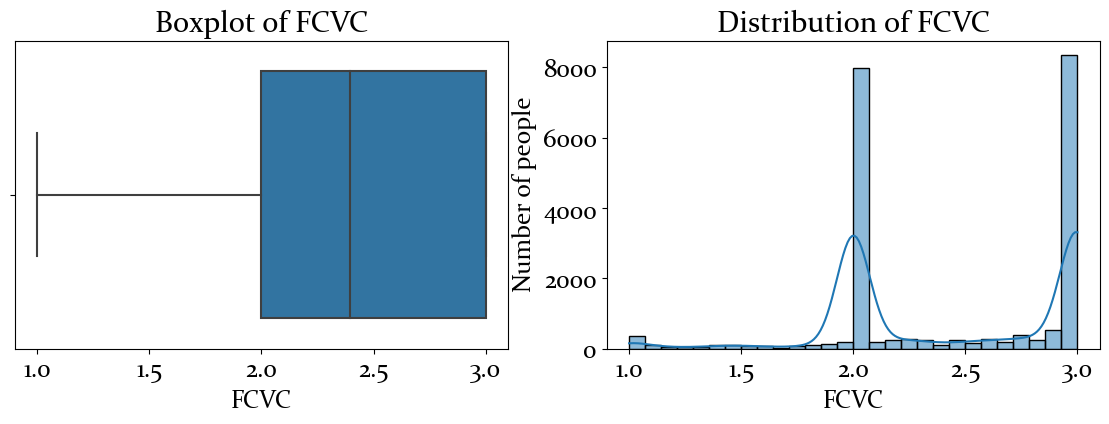

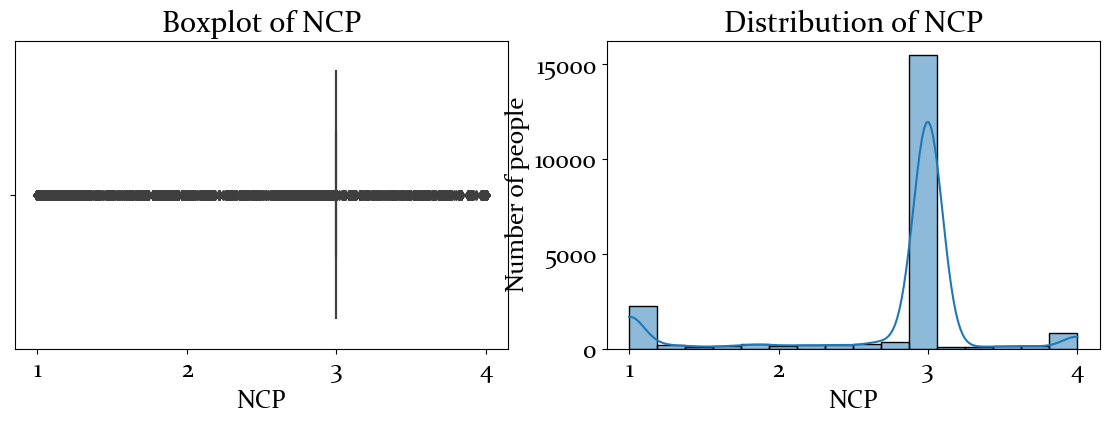

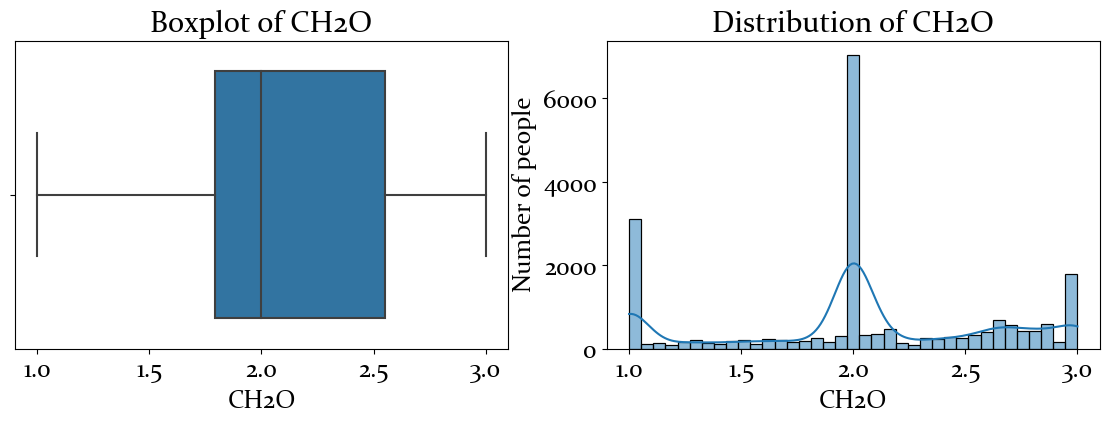

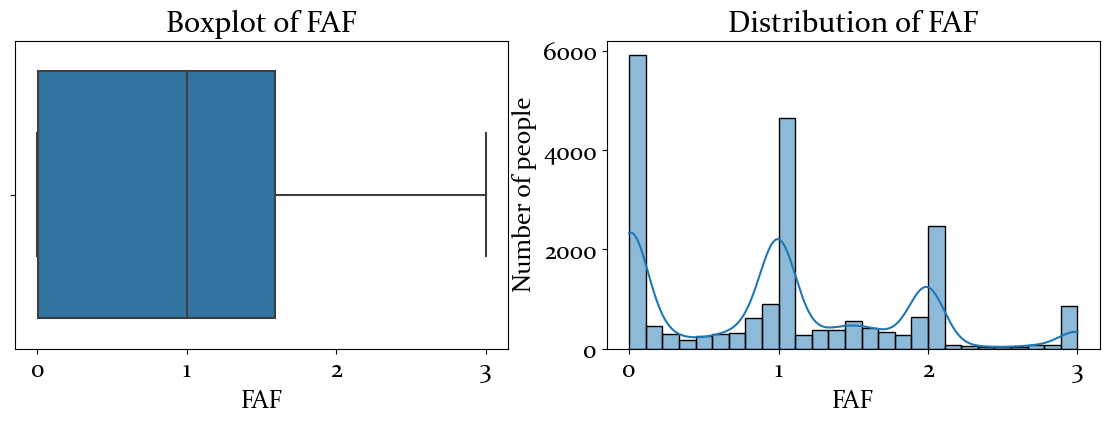

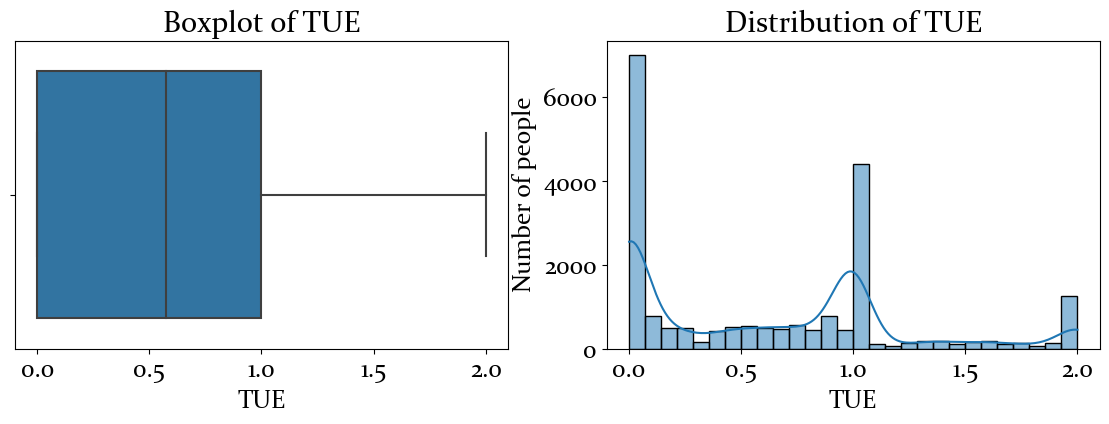

In [65]:
for var in numerical:
    plt.figure(figsize=(14,4))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(data=train,x = var)
    fig.set_title(f'Boxplot of {var}')
    
    plt.subplot(1, 2, 2)
    fig = sns.histplot(data=train,x = var,kde=True)
    fig.set_ylabel('Number of people')
    fig.set_xlabel(var)
    fig.set_title(f'Distribution of {var}')

    plt.show()

Numerical Observations
Some observations on the numerical columns

Age column has around half of the data in the range of 20-30 with lots of outliers at the right end.
the distribution is highly skewed towards the right

Height and Weight are  somewhat(not entirely) normally distributed with very few outliers. Weight new features like obses and not obese

FCVC - Frequency of consumption of vegetables - Is left skewed with 2 peaks. It says that 
a person on a average consumes vegatbles with 2 or 3 meals. We can check the possibility of binning this 
variable into 3 categories

NCP - Number of main meals - Majority of the people have 3 main meals with few people having either 1 or 4

Consumption of water daily (CH20) - WHO recommends around 3 litres consumption and here in the data we
have most of the people consumption around 2-2.5 litres. We can again check the possibility of binning this variable
into 3 categories like CALC

Physical activity frequency (FAF) - Most people do little to no excercise as per the distribution on the boxplot. yes/no feature can be derived


Time using technology devices (TUE) - Most people spend little to no time as per the distribution on the boxplot. 


In [66]:
train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


Taget variable analysis

Obesity_Type_III       0.194913
Obesity_Type_II        0.156470
Normal_Weight          0.148473
Obesity_Type_I         0.140187
Insufficient_Weight    0.121544
Overweight_Level_II    0.121495
Overweight_Level_I     0.116919
Name: NObeyesdad, dtype: float64


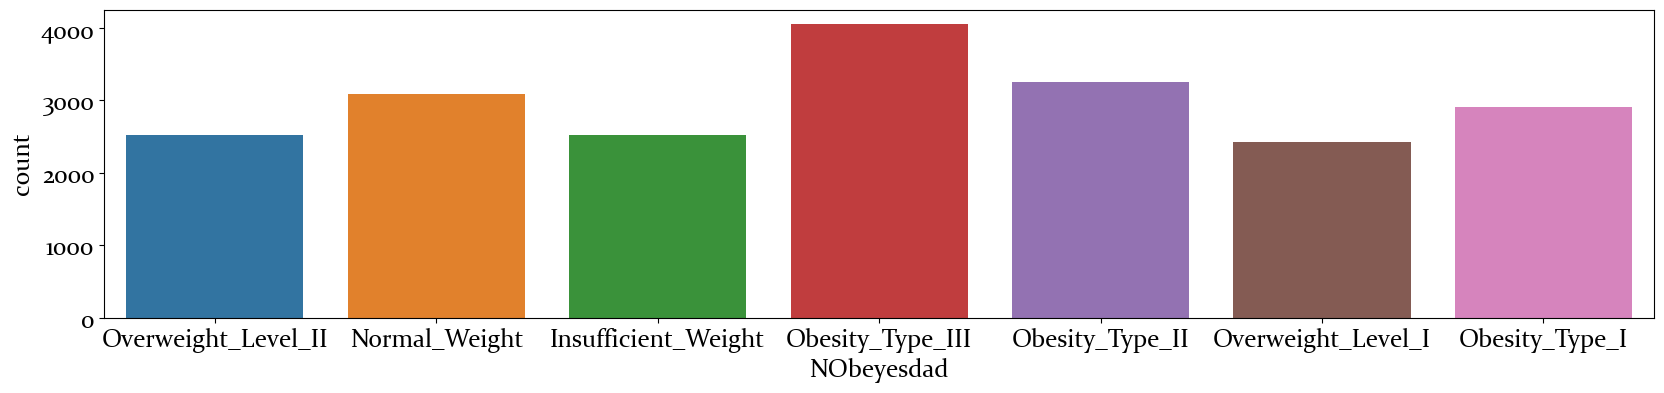

In [68]:
plt.figure(figsize=(20,4))
print(train[target].value_counts(normalize=True))
sns.countplot(data=train,x=target)
plt.show()

Target classes are almost equally distributed with Obesity_type_III as the most frequent class

Multivariate Analysis

Numerical vs numerical

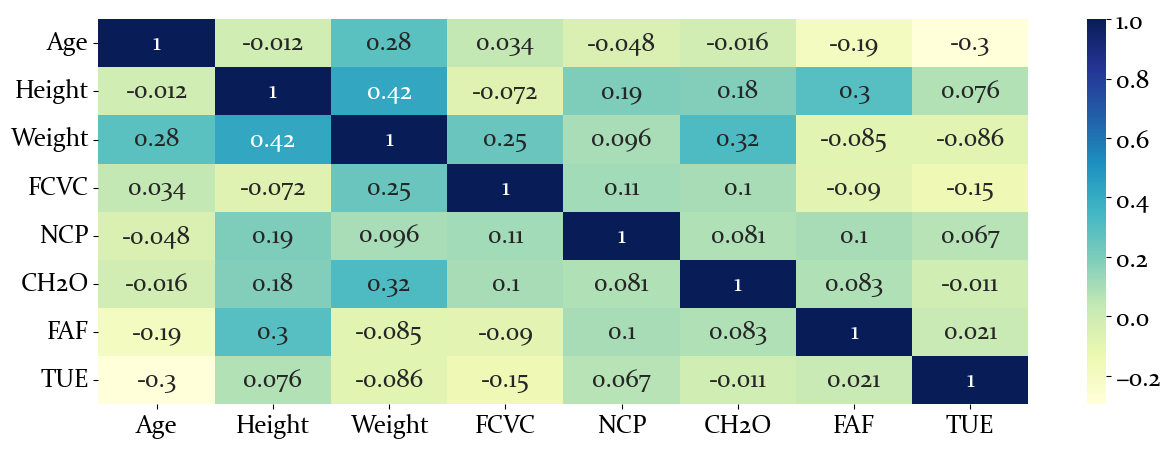

In [78]:
plt.figure(figsize=(15,5))
sns.heatmap(train[numerical].corr(), cmap="YlGnBu", annot=True)
plt.show()

No clear correlation between any of the numerical variables

Numerical vs target

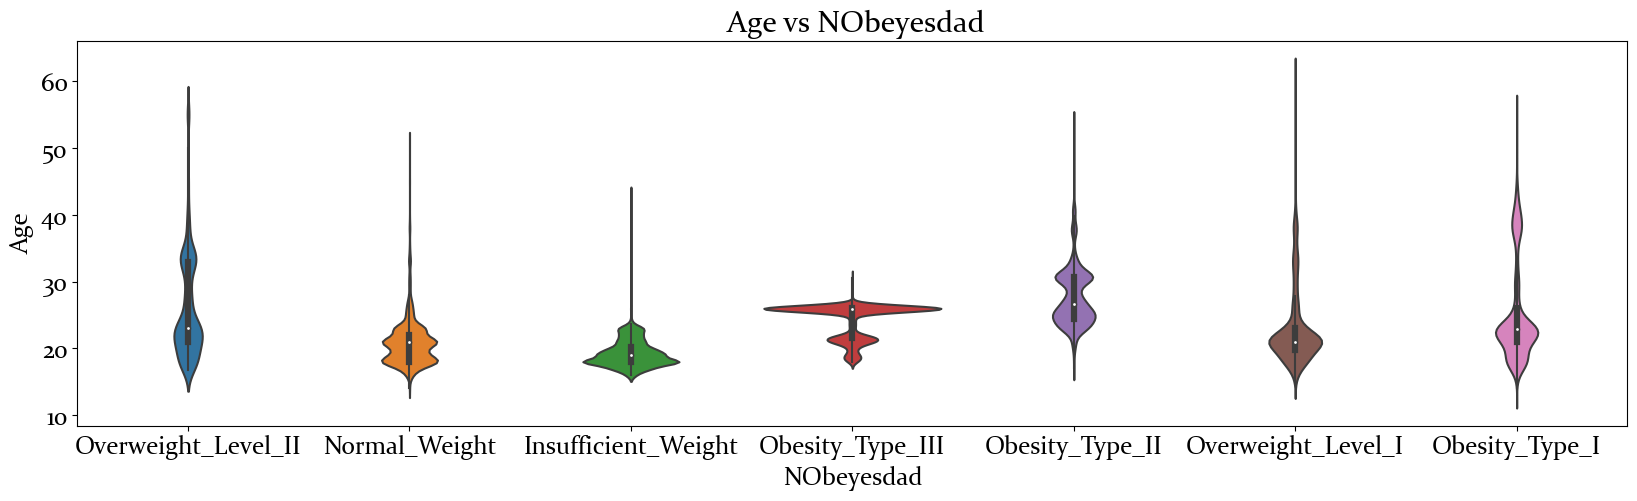

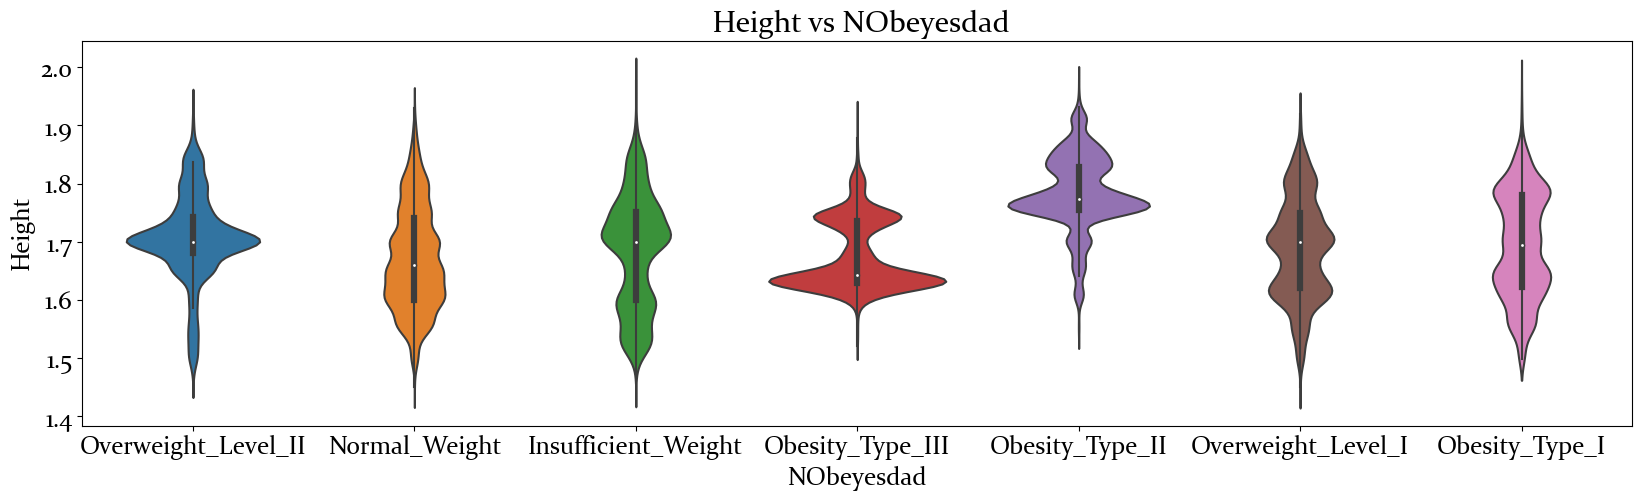

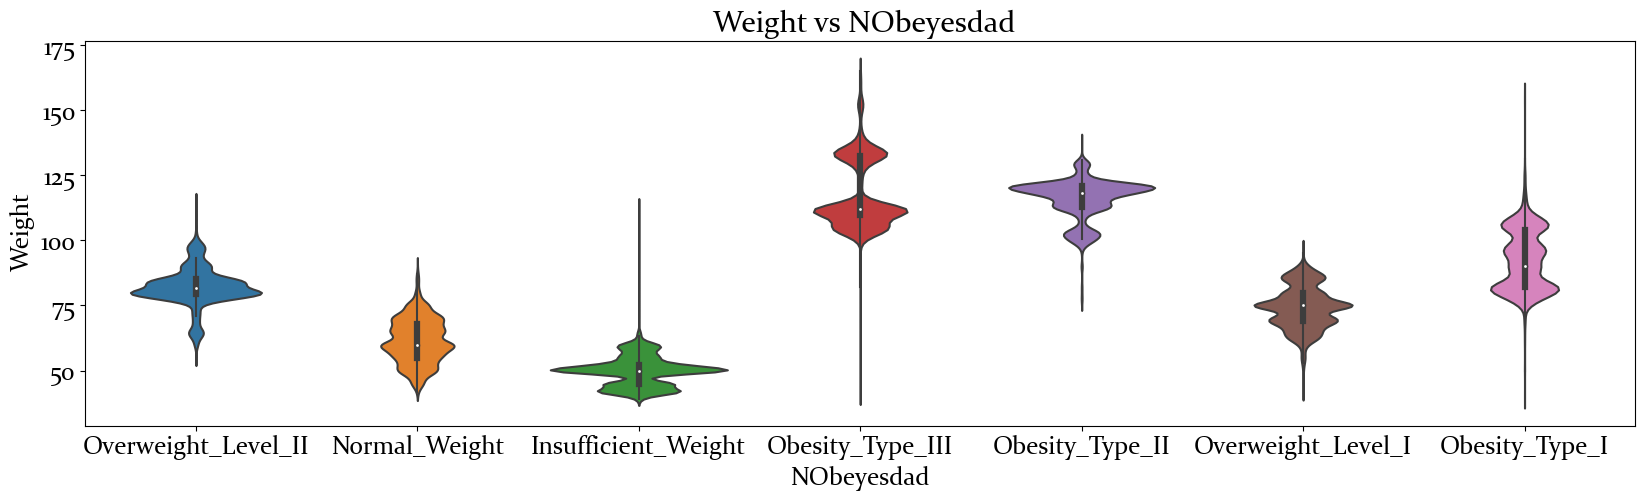

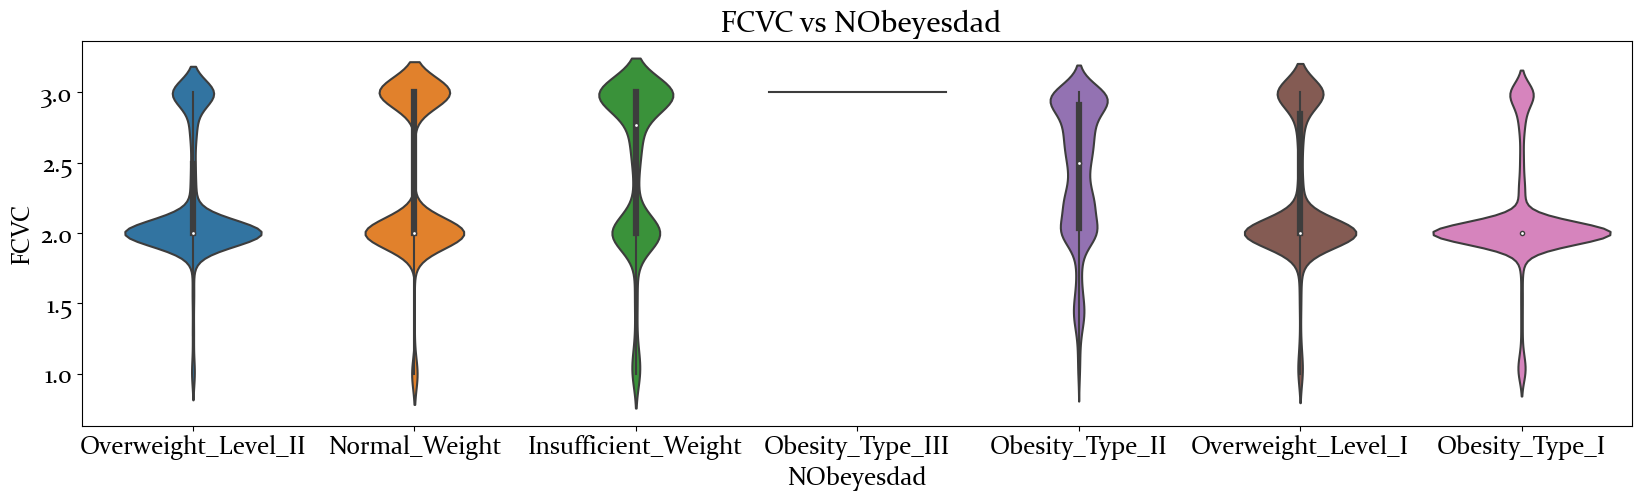

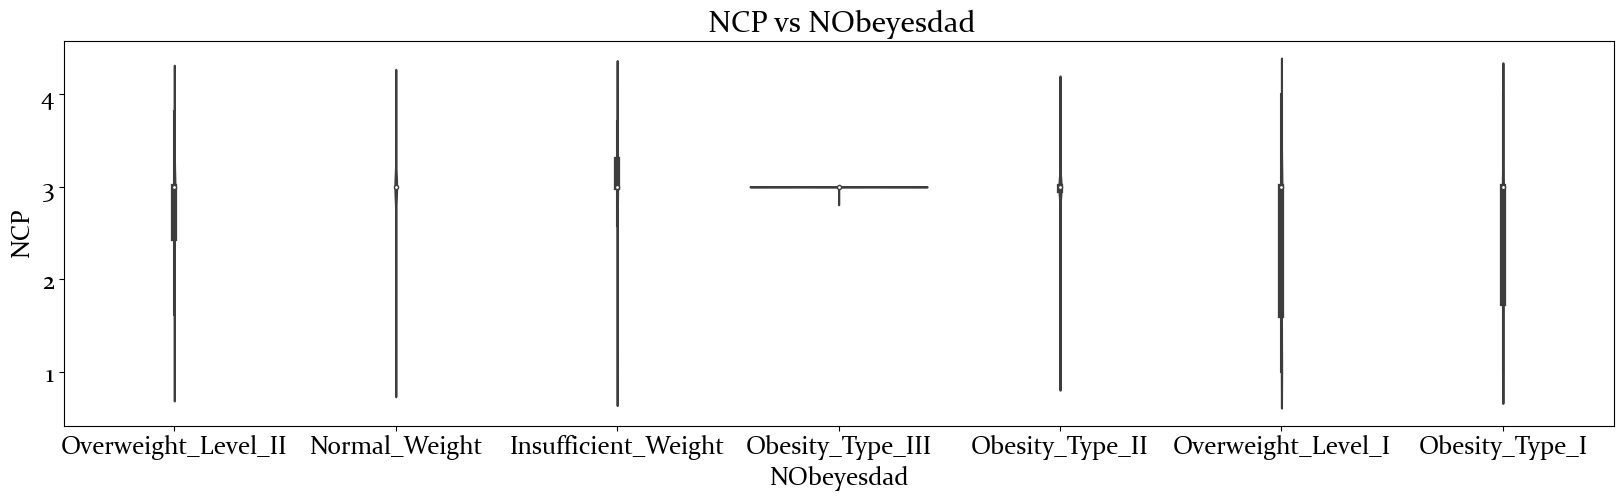

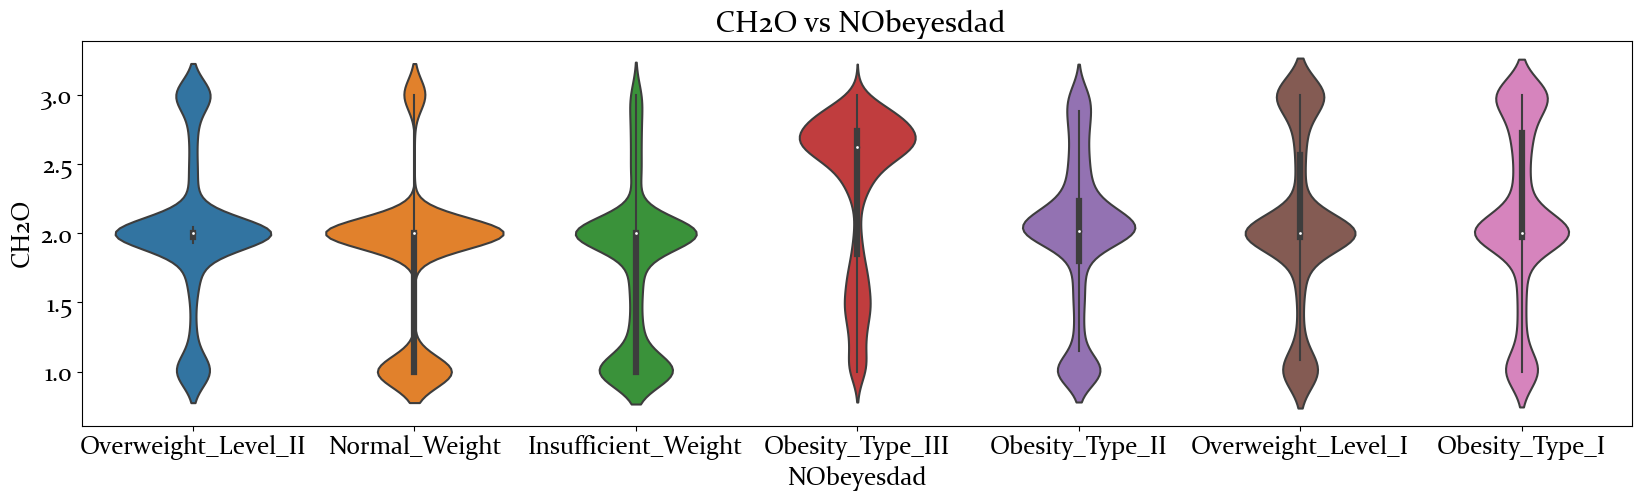

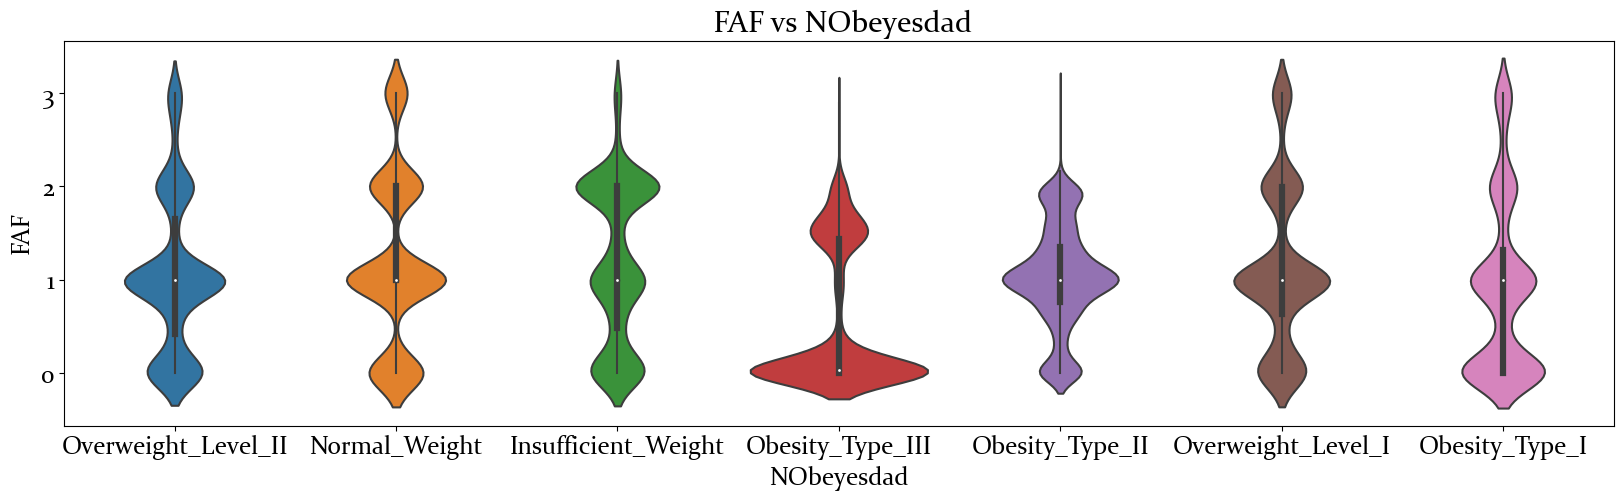

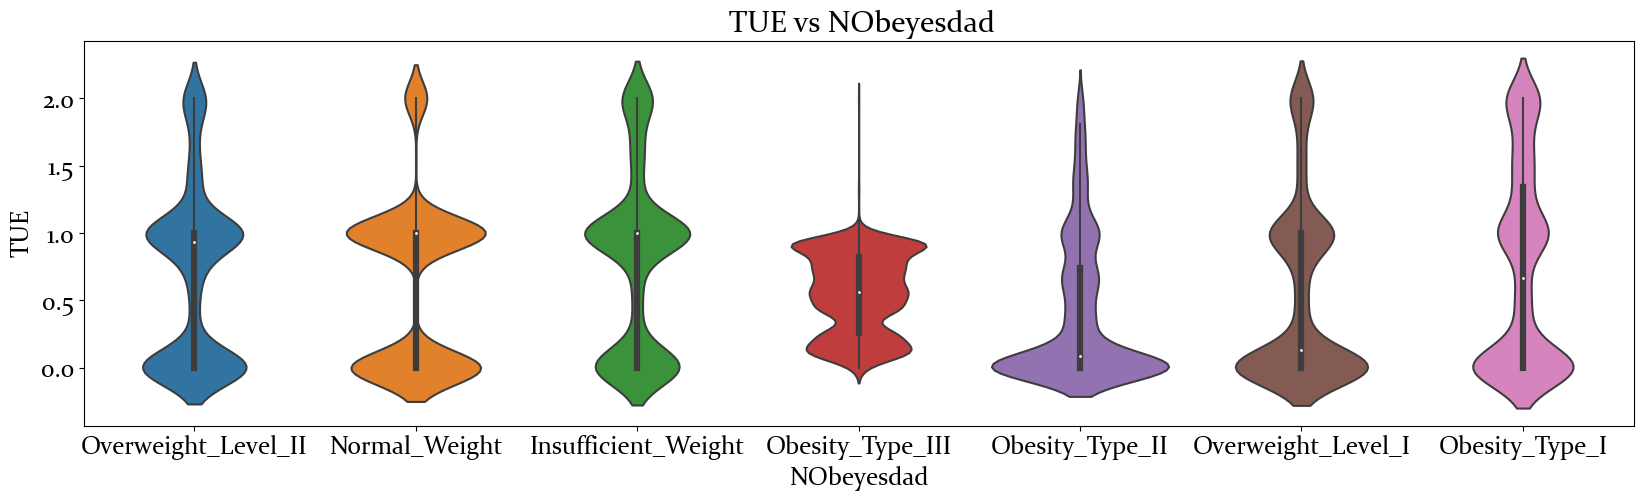

In [92]:
for var in numerical:
    plt.figure(figsize=(20,5))
    fig = sns.violinplot(x = target, y = var, data = train)
    fig.set_title(f' {var} vs NObeyesdad')
    plt.show()